In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# Load data
data = pd.read_csv('/content/SENSOR_FINAL_.csv')

# Fill missing values for numerical columns with the mean
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill missing values for categorical columns with the mode
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

# Drop columns where all values are missing
data = data.dropna(axis=1, how='all')

# Normalize/scale features
# Select features for scaling (excluding categorical columns if necessary)
features = data.select_dtypes(include=['number'])

# Initialize the scaler (choose between MinMaxScaler or StandardScaler)
scaler = MinMaxScaler()  # For Min-Max scaling
# scaler = StandardScaler()  # For Standardization

# Fit and transform the data
scaled_features = scaler.fit_transform(features)

# Create a DataFrame with the scaled features
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

# Replace the original features with scaled features
data[features.columns] = scaled_data

# Convert categorical columns to numeric using Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Verify the cleaned and scaled data
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       884 non-null    int64  
 1   sensor_00       884 non-null    float64
 2   sensor_01       884 non-null    float64
 3   sensor_02       884 non-null    float64
 4   sensor_03       884 non-null    float64
 5   sensor_04       884 non-null    float64
 6   sensor_05       884 non-null    float64
 7   sensor_06       884 non-null    float64
 8   sensor_07       884 non-null    float64
 9   sensor_08       884 non-null    float64
 10  sensor_09       884 non-null    float64
 11  sensor_10       884 non-null    float64
 12  sensor_11       884 non-null    float64
 13  sensor_12       884 non-null    float64
 14  sensor_13       884 non-null    float64
 15  sensor_14       884 non-null    float64
 16  sensor_16       884 non-null    float64
 17  sensor_17       884 non-null    flo

In [ ]:
has_nulls = data.isna().values.any()
print(f"Are there any null values in the dataset? {has_nulls}")
null_counts = data.isna().sum()
print("Null values by column:")
print(null_counts[null_counts > 0])

Are there any null values in the dataset? False
Null values by column:
Series([], dtype: int64)


In [ ]:
print(data.head())
print(data.columns)

   timestamp  sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
0          0   0.998804   0.251256   0.921427     0.9823   0.968751   
1          1   0.998804   0.251256   0.921427     0.9823   0.968751   
2          2   0.990434   0.281407   0.921427     1.0000   0.975675   
3          3   0.996811   0.251256   0.914285     1.0000   0.959163   
4          4   0.990833   0.256280   0.921427     1.0000   0.971947   

   sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_43  sensor_44  \
0   0.764598   0.973712   0.925572   0.858513  ...   0.145946   0.230263   
1   0.764598   0.973712   0.925572   0.858513  ...   0.145946   0.230263   
2   0.735461   0.967402   0.920167   0.861311  ...   0.143243   0.223684   
3   0.769891   0.966877   0.932225   0.865708  ...   0.135135   0.217105   
4   0.765891   0.969506   0.930146   0.865708  ...   0.140541   0.210526   

   sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  sensor_50  \
0   0.213198   0.096403   0.084871   0.266338

Statistical Analysis:
        timestamp   sensor_00   sensor_01   sensor_02   sensor_03   sensor_04  \
count  884.000000  884.000000  884.000000  884.000000  884.000000  884.000000   
mean   441.500000    0.980683    0.197492    0.476698    0.507378    0.320673   
std    255.333116    0.066486    0.189588    0.343632    0.317216    0.453020   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%    220.750000    0.980683    0.035175    0.135714    0.123894    0.000355   
50%    441.500000    0.980683    0.105527    0.414285    0.584071    0.000355   
75%    662.250000    0.990833    0.396984    0.878571    0.761062    0.962226   
max    883.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        sensor_05   sensor_06   sensor_07     sensor_08  ...   sensor_43  \
count  884.000000  884.000000  884.000000  8.840000e+02  ...  884.000000   
mean     0.371054    0.559389    0.590124  5.621644e-01  ...    0.160878   
std      0.409587   

<Figure size 2000x1500 with 0 Axes>

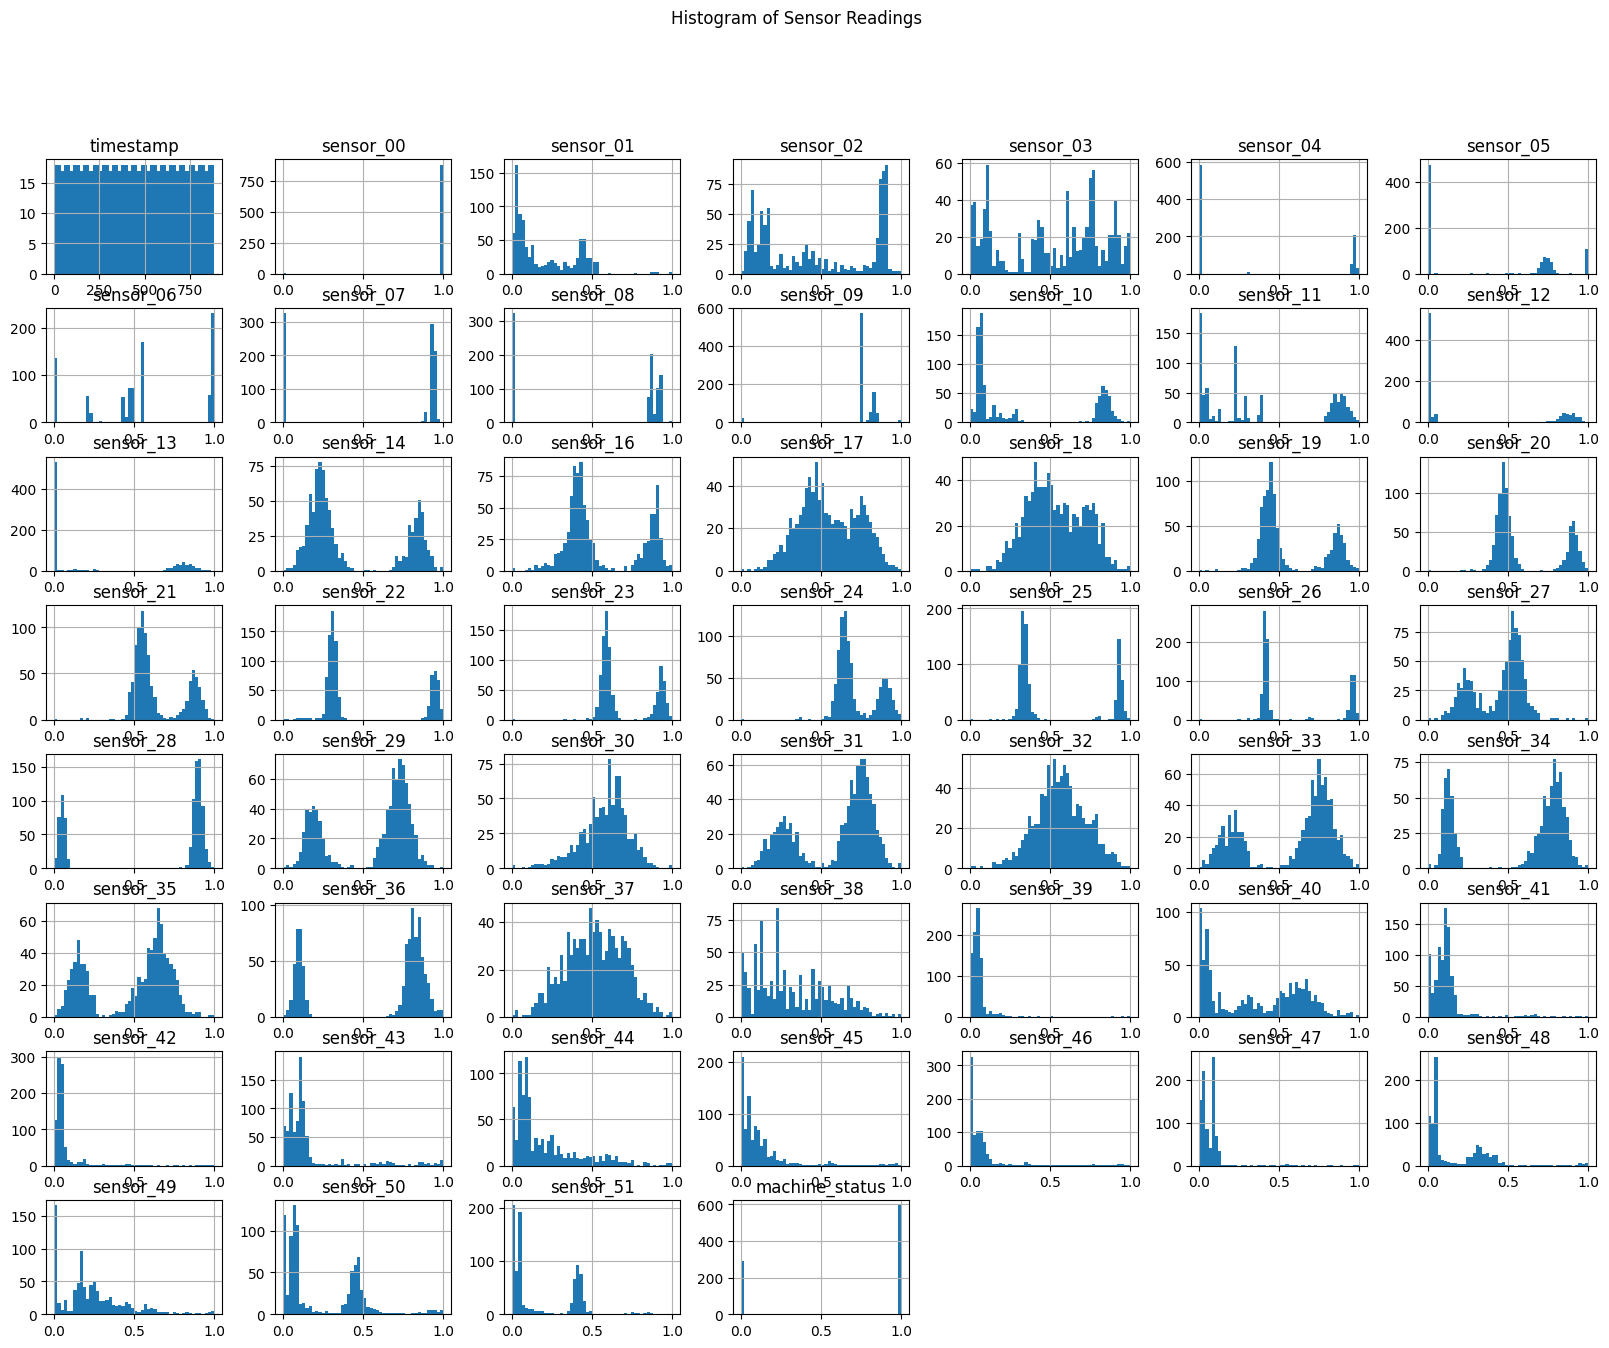

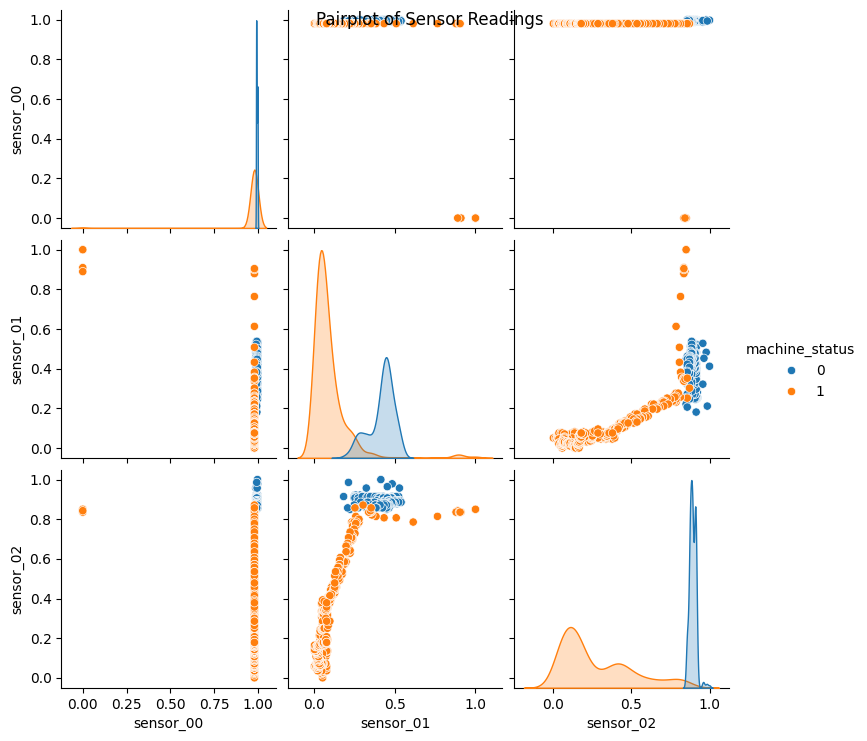

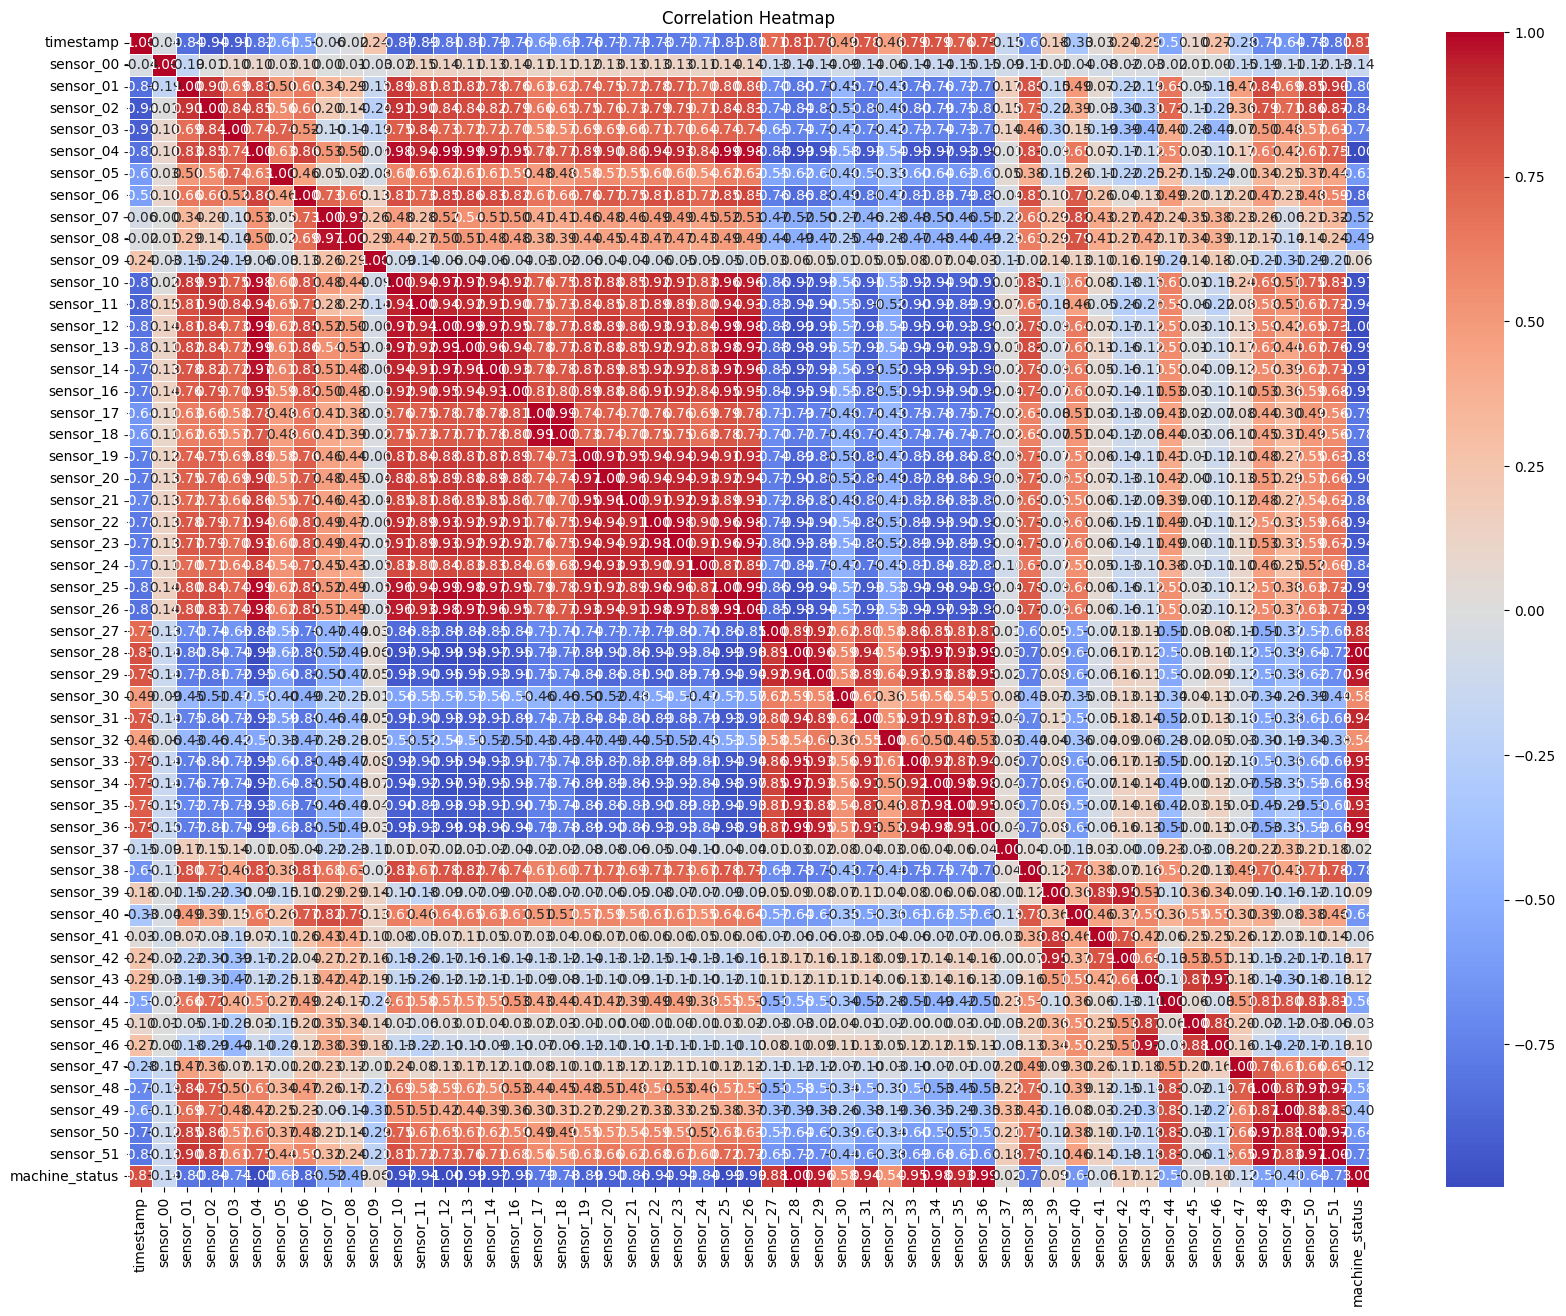

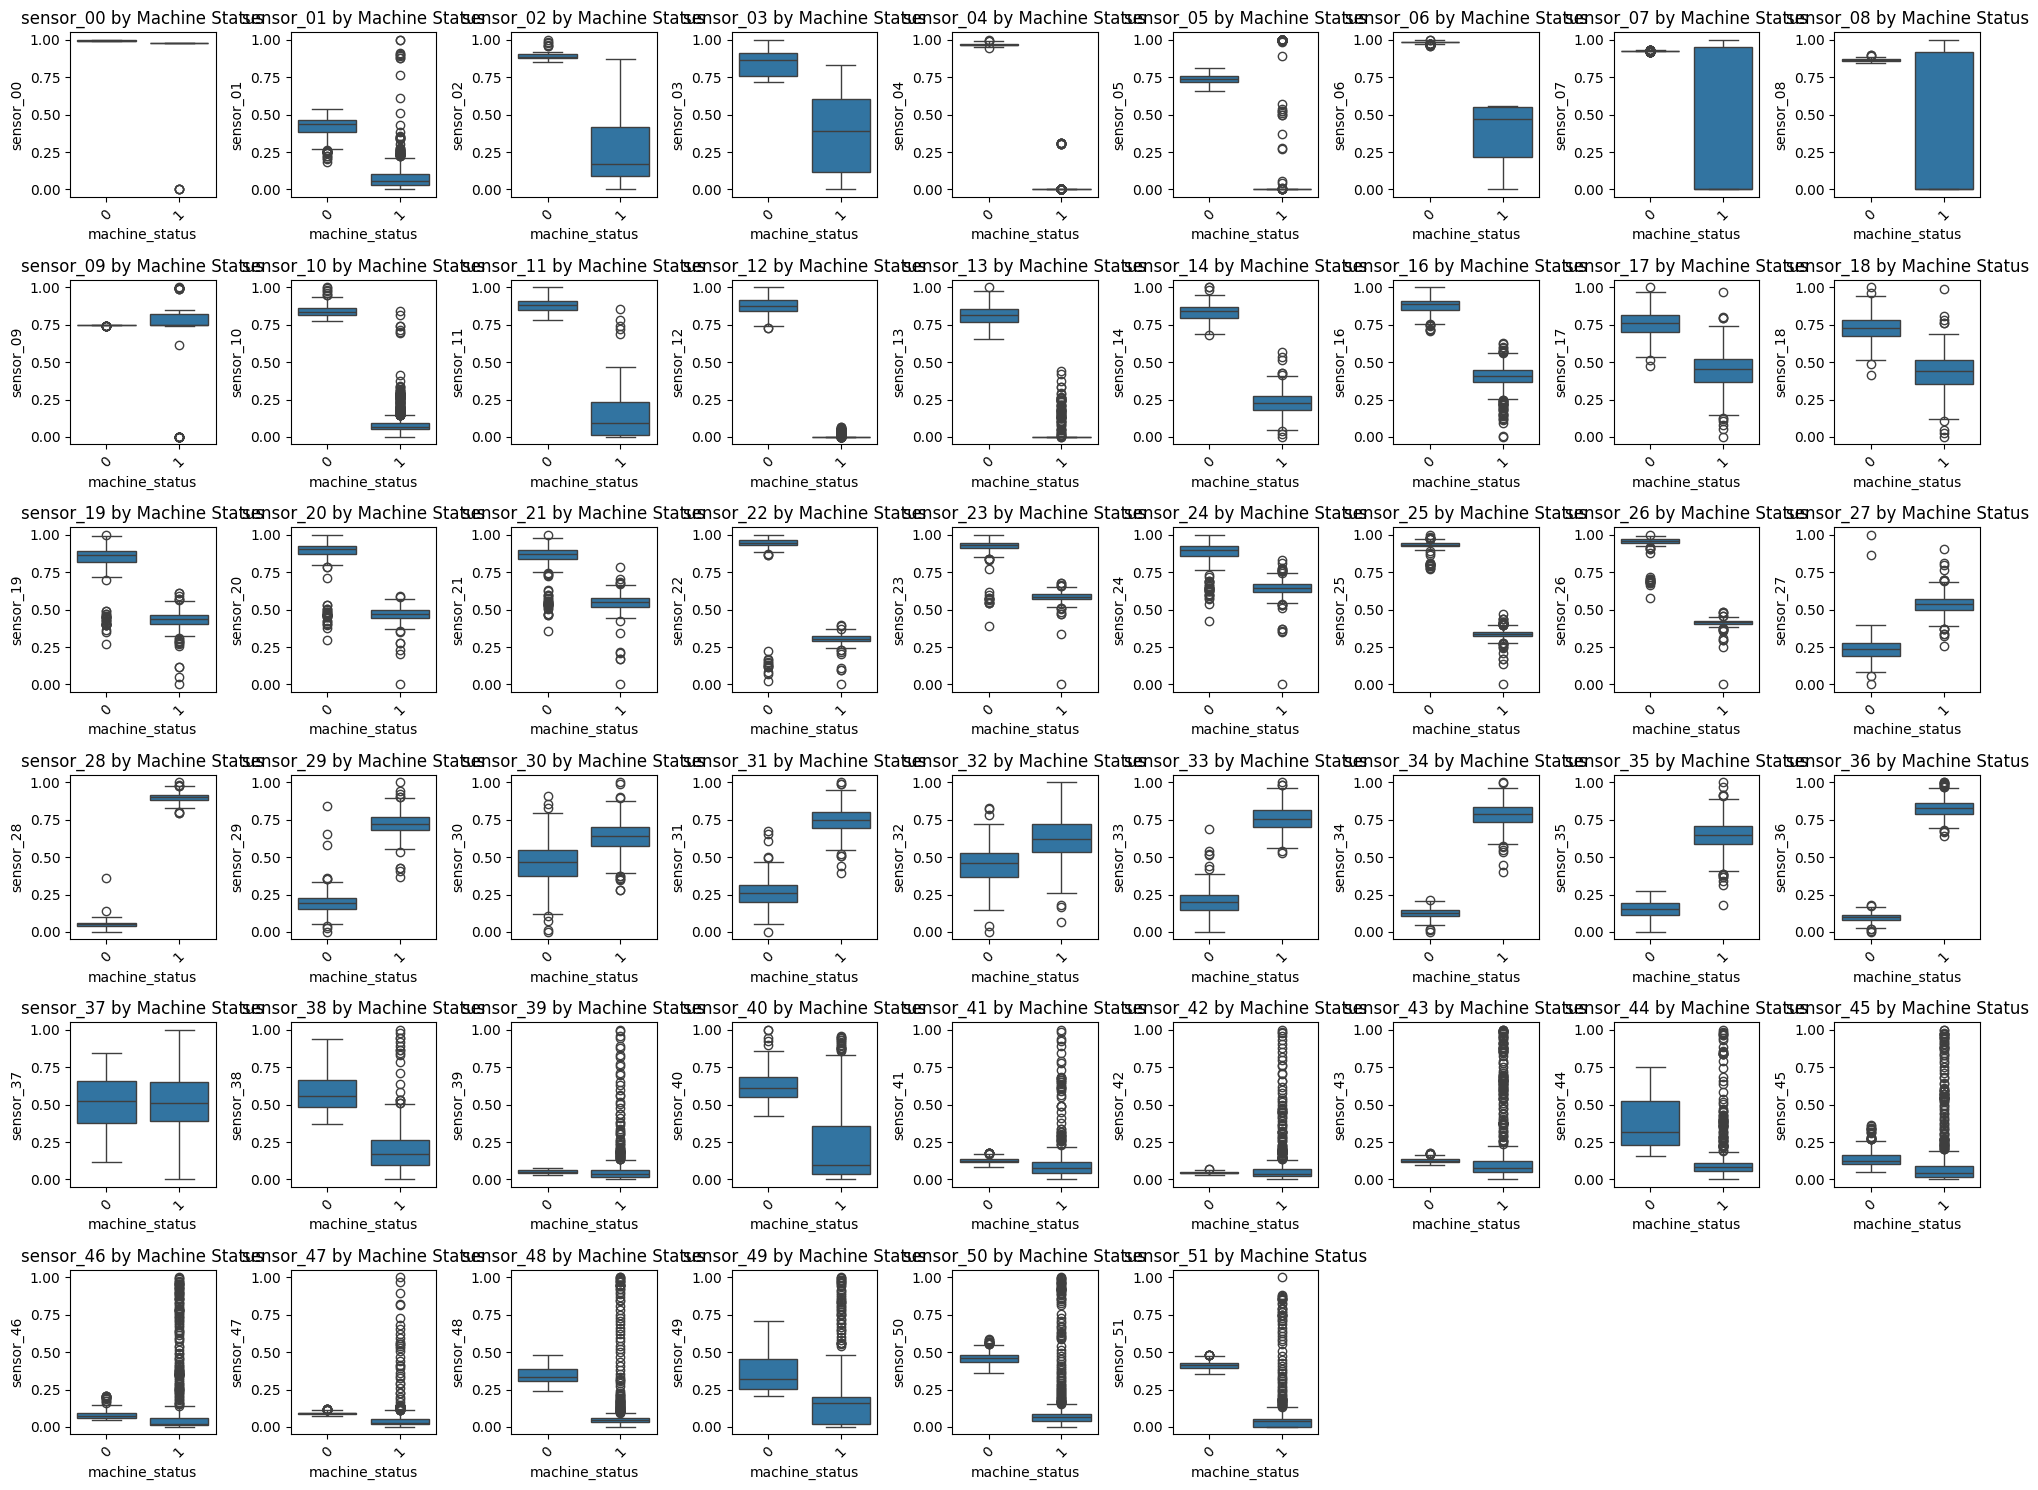

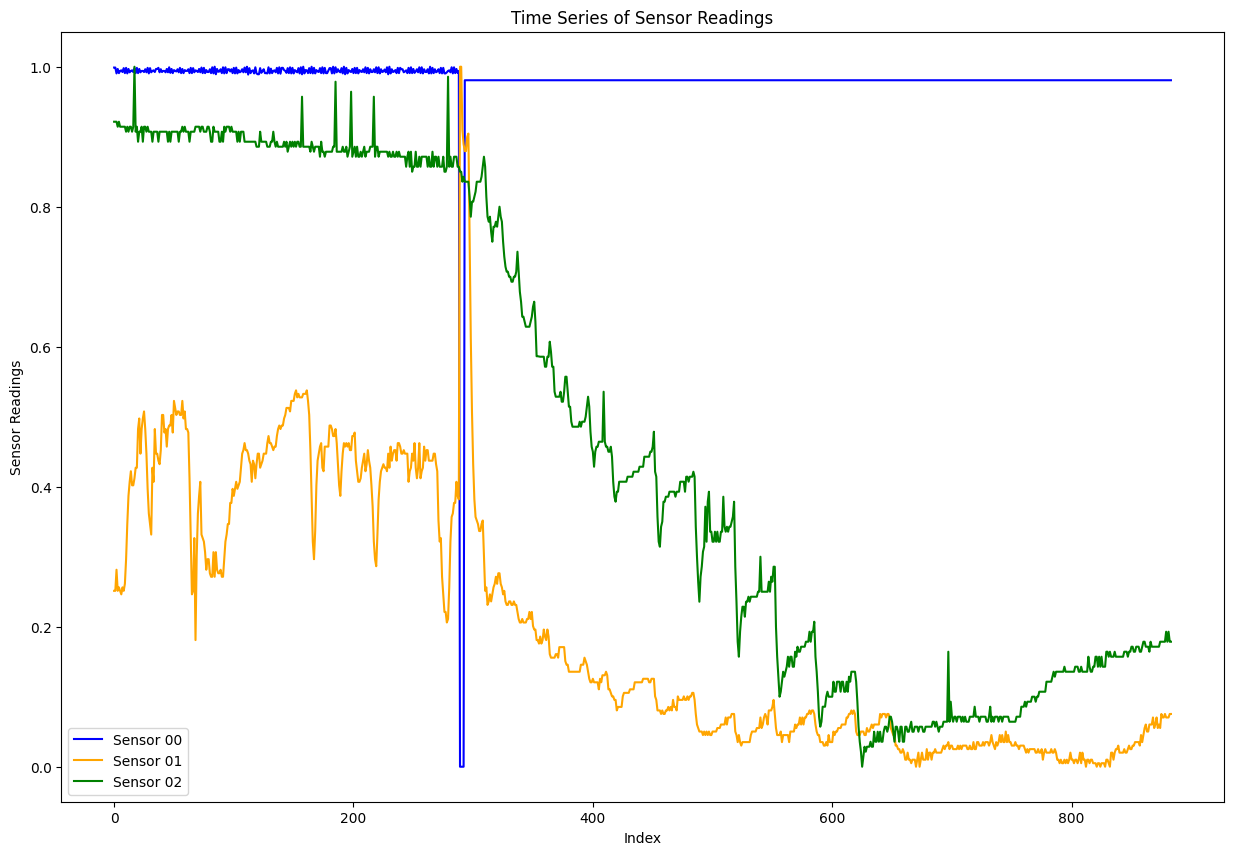

<Figure size 2000x1500 with 0 Axes>

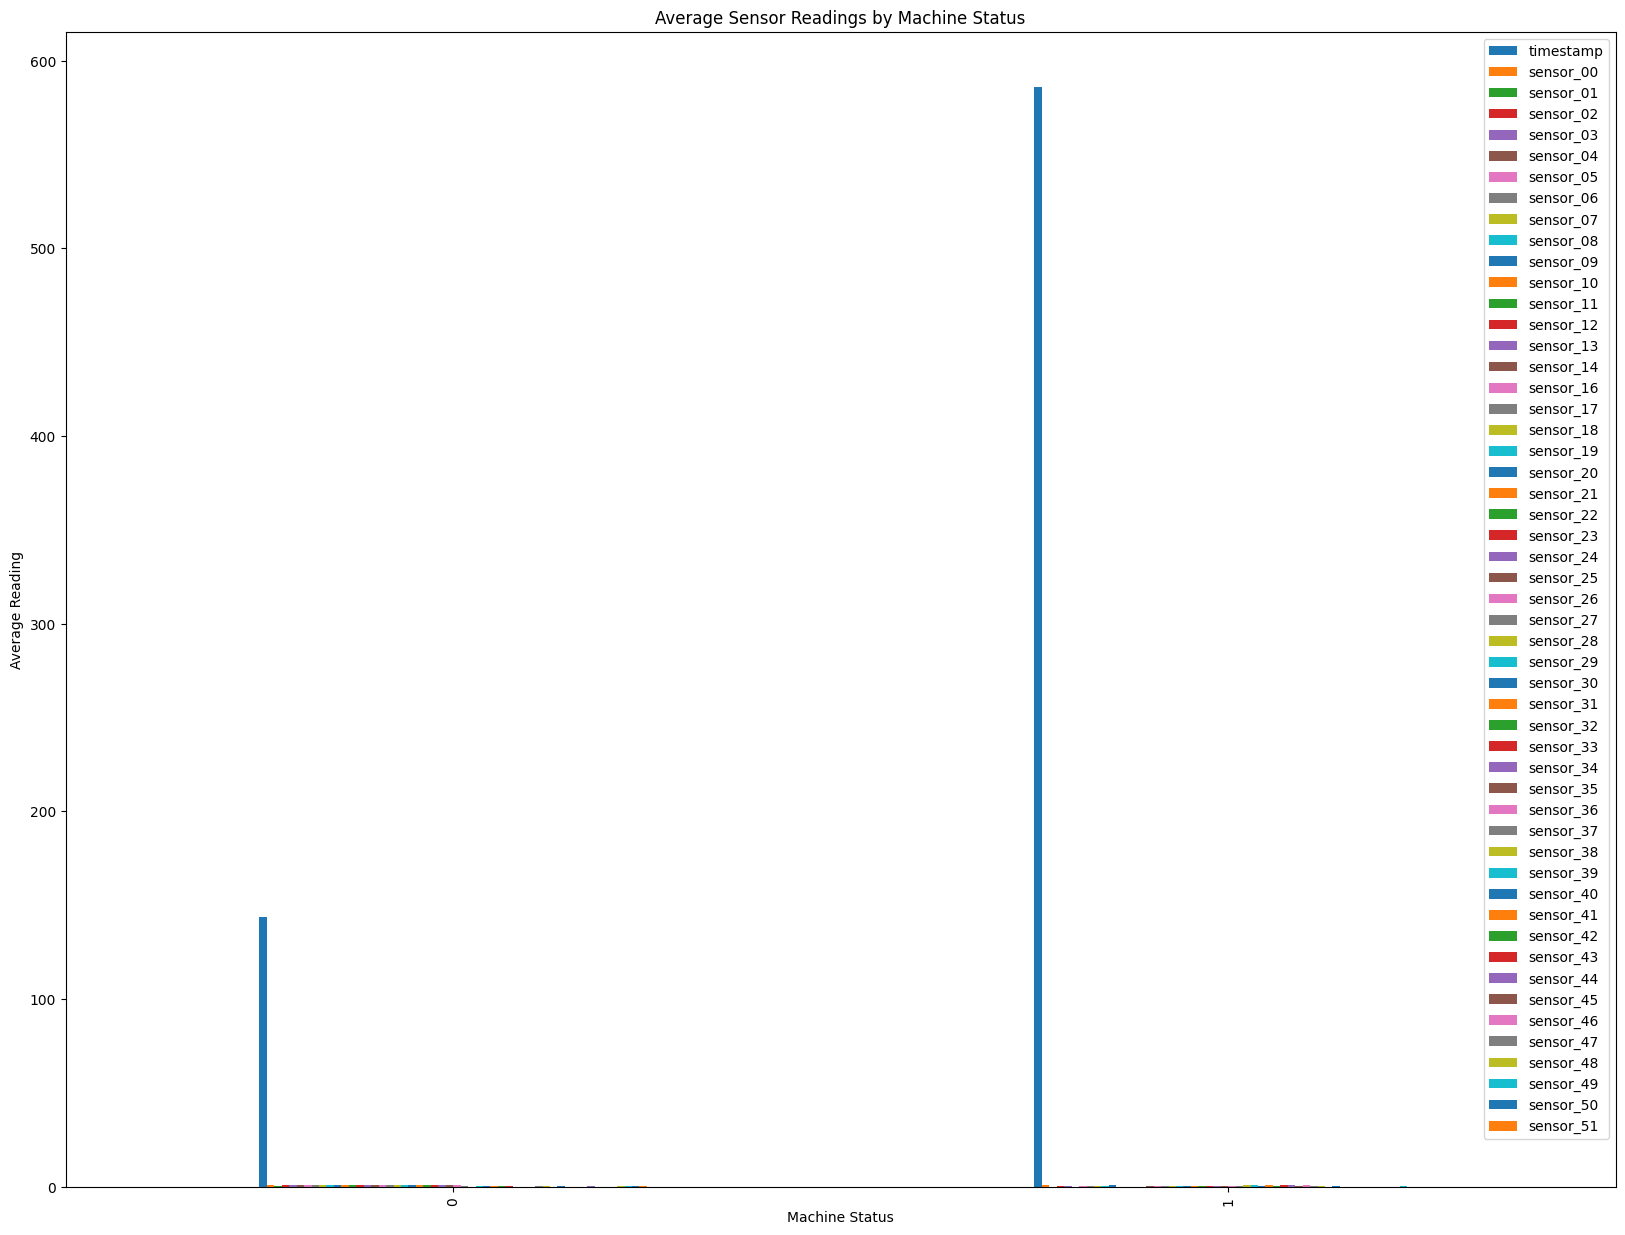

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Perform Statistical Analysis
print("Statistical Analysis:")
print(data.describe())

# Machine status distribution
print("\nMachine Status Distribution:")
print(data['machine_status'].value_counts())

# 2. Visualize Trends and Patterns

# Histogram of sensor readings
plt.figure(figsize=(20, 15))
data.hist(bins=50, figsize=(20, 15))
plt.suptitle('Histogram of Sensor Readings')
plt.show()

# Pairplot to visualize relationships between sensors and machine status
sns.pairplot(data[['sensor_00', 'sensor_01', 'sensor_02', 'machine_status']], hue='machine_status')
plt.suptitle('Pairplot of Sensor Readings')
plt.show()

# Correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 3. Identify Potential Indicators of Equipment Failure

# Boxplot of sensor readings by machine status
plt.figure(figsize=(20, 15))
for i, sensor in enumerate(data.columns[1:-1], 1):  # Exclude 'timestamp' and 'machine_status'
    plt.subplot(6, 9, i)
    sns.boxplot(x='machine_status', y=sensor, data=data)
    plt.title(f'{sensor} by Machine Status')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Time series plot for a few sensor readings
plt.figure(figsize=(15, 10))
plt.plot(data.index, data['sensor_00'], label='Sensor 00', color='blue')
plt.plot(data.index, data['sensor_01'], label='Sensor 01', color='orange')
plt.plot(data.index, data['sensor_02'], label='Sensor 02', color='green')
plt.xlabel('Index')
plt.ylabel('Sensor Readings')
plt.title('Time Series of Sensor Readings')
plt.legend()
plt.show()

# Average sensor readings by machine status
plt.figure(figsize=(20, 15))
status_means = data.groupby('machine_status').mean()
status_means.plot(kind='bar', figsize=(20, 15))
plt.title('Average Sensor Readings by Machine Status')
plt.xlabel('Machine Status')
plt.ylabel('Average Reading')
plt.show()

In [ ]:
# Select a subset of numeric columns for demonstration
subset_cols = ['sensor_00', 'sensor_01', 'sensor_02']  # Example subset of columns
subset_data = data[subset_cols].copy()

# Create a DataFrame to hold new features
new_features = pd.DataFrame(index=subset_data.index)

# Create rolling statistics
rolling_windows = [3, 5, 10]  # Window sizes for rolling statistics
for window in rolling_windows:
    for col in subset_cols:
        if col in subset_data.columns:
            new_features[f'{col}_rolling_mean_{window}'] = subset_data[col].rolling(window=window).mean()
            new_features[f'{col}_rolling_std_{window}'] = subset_data[col].rolling(window=window).std()

# Create rate of change features
for col in subset_cols:
    if col in subset_data.columns:
        new_features[f'{col}_rate_of_change'] = subset_data[col].diff().fillna(0)

# Create cumulative statistics
for col in subset_cols:
    if col in subset_data.columns:
        new_features[f'{col}_cumulative_sum'] = subset_data[col].cumsum()
        new_features[f'{col}_cumulative_mean'] = subset_data[col].expanding().mean()

# Create lag features
lag_steps = [1, 2, 5]  # Lag steps for lag features
for lag in lag_steps:
    for col in subset_cols:
        if col in subset_data.columns:
            new_features[f'{col}_lag_{lag}'] = subset_data[col].shift(lag).fillna(0)

# Check the new features
print(new_features.head())
print(new_features.columns)

   sensor_00_rolling_mean_3  sensor_00_rolling_std_3  \
0                       NaN                      NaN   
1                       NaN                      NaN   
2                  0.996014                 0.004832   
3                  0.995350                 0.004372   
4                  0.992693                 0.003572   

   sensor_01_rolling_mean_3  sensor_01_rolling_std_3  \
0                       NaN                      NaN   
1                       NaN                      NaN   
2                  0.261306                 0.017408   
3                  0.261306                 0.017408   
4                  0.262981                 0.016154   

   sensor_02_rolling_mean_3  sensor_02_rolling_std_3  \
0                       NaN                      NaN   
1                       NaN                      NaN   
2                  0.921427                 0.000000   
3                  0.919046                 0.004124   
4                  0.919046                 0.

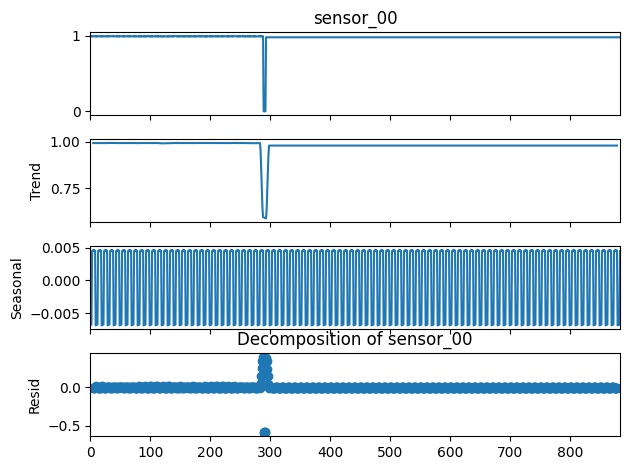

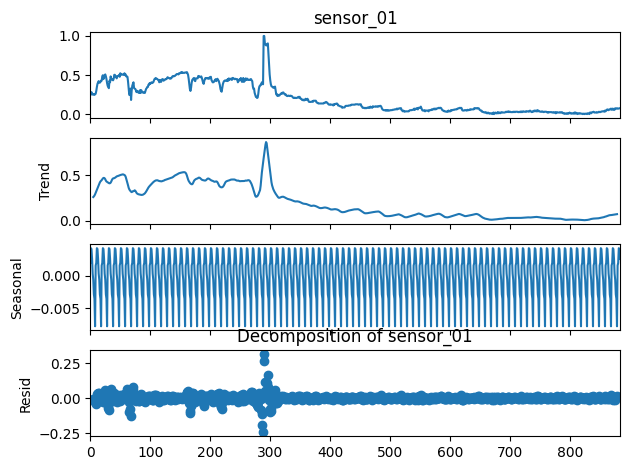

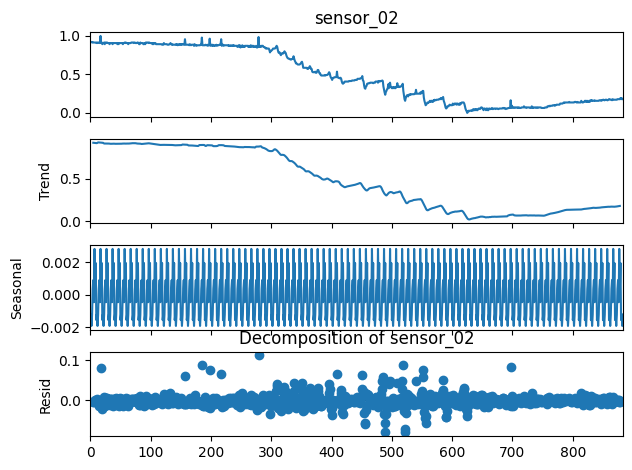

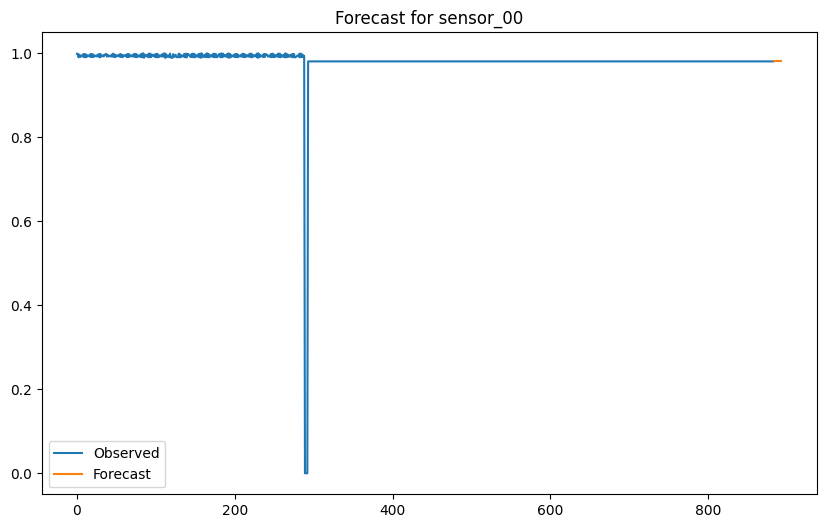

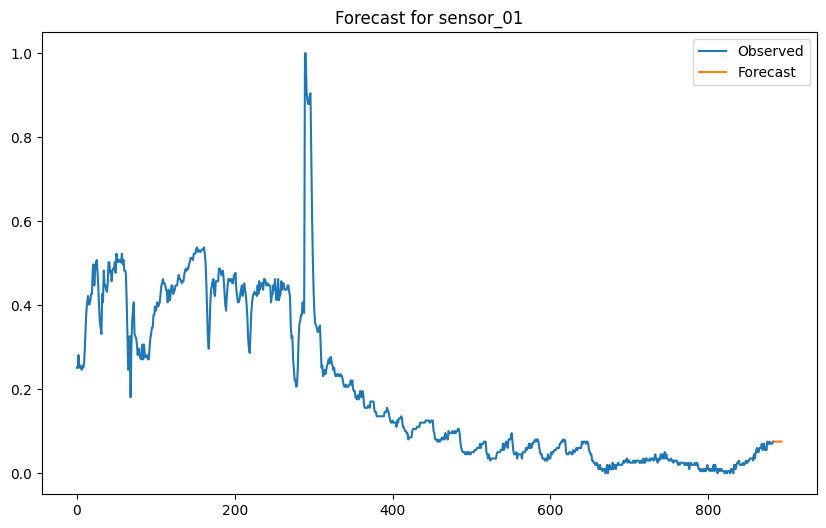

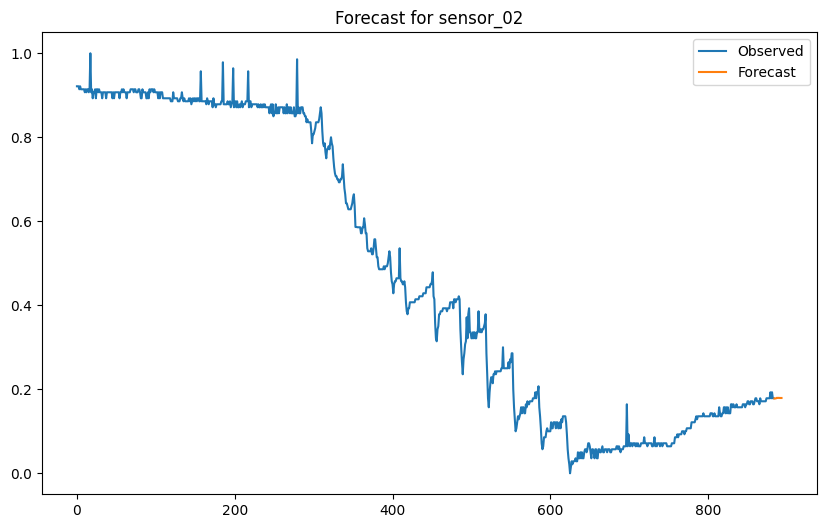

In [ ]:
import pandas as pd

# Select columns of interest
subset_cols = ['sensor_00', 'sensor_01', 'sensor_02']
subset_data = data[subset_cols]
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt



for col in subset_cols:
    result = seasonal_decompose(data[col], model='additive', period=10)  # Adjust period as needed
    result.plot()
    plt.title(f'Decomposition of {col}')
    plt.show()
from statsmodels.tsa.arima.model import ARIMA

for col in subset_cols:
    # Fit ARIMA model
    model = ARIMA(data[col], order=(5, 1, 0))  # Adjust order as needed
    model_fit = model.fit()

    # Make predictions
    forecast = model_fit.forecast(steps=10)  # Forecast 10 steps ahead
    plt.figure(figsize=(10, 6))
    plt.plot(data[col], label='Observed')
    plt.plot(pd.Series(forecast, index=range(len(data[col]), len(data[col]) + 10)), label='Forecast')
    plt.title(f'Forecast for {col}')
    plt.legend()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.utils import resample

# Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Introduce increased noise to the features
noise_level = 1.0  # Increased noise level
noise = np.random.normal(0, noise_level, data.drop(columns=['timestamp', 'machine_status']).shape)
data_with_noise = data.copy()
data_with_noise[data.drop(columns=['timestamp', 'machine_status']).columns] += noise

# Introduce missing values randomly
missing_rate = 0.1  # 10% missing values
num_missing = int(missing_rate * data_with_noise.size)
missing_indices = np.random.choice(data_with_noise.size, num_missing, replace=False)
data_with_noise.values.ravel()[missing_indices] = np.nan

# Add synthetic features to increase complexity
num_synthetic_features = 10  # Increased number of synthetic features
for i in range(num_synthetic_features):
    data_with_noise[f'synthetic_feature_{i}'] = np.random.normal(0, 1, size=data_with_noise.shape[0])

# Separating features and target variable
X = data_with_noise.drop(columns=['timestamp', 'machine_status'])  # Dropping 'timestamp' and target column
y = data['machine_status']

# Handle missing values by filling with the median of each feature
X.fillna(X.median(), inplace=True)

# Balance the data
X_balanced, y_balanced = resample(X, y, stratify=y, n_samples=min(y.value_counts()), random_state=42)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced
)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models with adjusted parameters
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=50,  # Reduce the number of trees
        max_depth=15,     # Moderate depth
        min_samples_split=10,  # Increase min_samples_split to reduce overfitting
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=50,  # Reduce the number of boosting stages
        learning_rate=0.1,  # Set a moderate learning rate
        max_depth=6,  # Limit depth to prevent overfitting
        random_state=42
    ),
    'Support Vector Machine': SVC(
        C=10,              # Increased regularization
        kernel='poly',     # Use polynomial kernel
        degree=3,          # Polynomial degree
        gamma='scale',     # Kernel coefficient
        probability=True,  # Enable probability estimates
        random_state=42
    )
}

# Model Evaluation Dictionary
evaluation_results = {}

# Train and evaluate models
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Perform cross-validation to check for overfitting
    cv_scores = cross_val_score(model, X_balanced, y_balanced, cv=5, scoring='roc_auc')
    print(f"{model_name} CV ROC-AUC Scores: {cv_scores.mean()} ± {cv_scores.std()}")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # Store evaluation results
    evaluation_results[model_name] = {
        'Accuracy': accuracy,
        'ROC-AUC': roc_auc,
        'Classification Report': report,
        'Confusion Matrix': confusion
    }

    print(f"Finished {model_name}.\n")

# Display Evaluation Results
for model_name, results in evaluation_results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {results['Accuracy']:.4f}")
    print(f"ROC-AUC Score: {results['ROC-AUC']:.4f}")
    print(f"Classification Report:\n{results['Classification Report']}")
    print(f"Confusion Matrix:\n{results['Confusion Matrix']}")
    print("-------------------------------------------------------------\n")


Training Random Forest...
Random Forest CV ROC-AUC Scores: 0.9347428400059978 ± 0.010298851419866015
Finished Random Forest.

Training Gradient Boosting...
Gradient Boosting CV ROC-AUC Scores: 0.7744189533663218 ± 0.0485139525206011
Finished Gradient Boosting.

Training Support Vector Machine...
Support Vector Machine CV ROC-AUC Scores: 0.9785874943769681 ± 0.008808647790768752
Finished Support Vector Machine.

Model: Random Forest
Accuracy: 0.8506
ROC-AUC Score: 0.9770
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.57      0.71        28
           1       0.83      0.98      0.90        59

    accuracy                           0.85        87
   macro avg       0.88      0.78      0.81        87
weighted avg       0.86      0.85      0.84        87

Confusion Matrix:
[[16 12]
 [ 1 58]]
-------------------------------------------------------------

Model: Gradient Boosting
Accuracy: 0.8161
ROC-AUC Score: 0.7760
Classificat

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import classification_report, confusion_matrix

# Load or prepare your dataset
# For example:
# data = pd.read_csv('your_dataset.csv')

# Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Introduce increased noise to the features
noise_level = 1.0  # Increased noise level
noise = np.random.normal(0, noise_level, data.drop(columns=['timestamp', 'machine_status']).shape)
data_with_noise = data.copy()
data_with_noise[data.drop(columns=['timestamp', 'machine_status']).columns] += noise

# Introduce missing values randomly
missing_rate = 0.1  # 10% missing values
num_missing = int(missing_rate * data_with_noise.size)
missing_indices = np.random.choice(data_with_noise.size, num_missing, replace=False)
data_with_noise.values.ravel()[missing_indices] = np.nan

# Add synthetic features to increase complexity
num_synthetic_features = 10  # Increased number of synthetic features
for i in range(num_synthetic_features):
    data_with_noise[f'synthetic_feature_{i}'] = np.random.normal(0, 1, size=data_with_noise.shape[0])

# Separating features and target variable
X = data_with_noise.drop(columns=['timestamp', 'machine_status'])  # Dropping 'timestamp' and target column
y = data['machine_status']  # Assuming 'machine_status' is your target variable

# Handle missing values by filling with the median of each feature
X.fillna(X.median(), inplace=True)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize anomaly detection models
models = {
    'Isolation Forest': IsolationForest(contamination=0.1, random_state=42),
    'One-Class SVM': OneClassSVM(nu=0.1, kernel='rbf', gamma='scale'),
    'Local Outlier Factor': LocalOutlierFactor(n_neighbors=20, contamination=0.1),
    'Elliptic Envelope': EllipticEnvelope(contamination=0.1)
}

# Dictionary to store results
results = {}

# Train and evaluate models
for model_name, model in models.items():
    print(f"Training {model_name}...")

    if model_name == 'Local Outlier Factor':
        y_pred = model.fit_predict(X_scaled)
        # Convert to binary classification for evaluation
        y_pred = np.where(y_pred == -1, 1, 0)  # -1 for anomalies, 1 for normal
    elif model_name == 'Elliptic Envelope':
        model.fit(X_scaled)
        y_pred = model.predict(X_scaled)
        y_pred = np.where(y_pred == -1, 1, 0)  # -1 for anomalies, 1 for normal
    else:
        y_pred = model.fit_predict(X_scaled)
        y_pred = np.where(y_pred == -1, 1, 0)  # -1 for anomalies, 1 for normal

    # Calculate metrics
    accuracy = np.mean(y_pred == y)
    confusion = confusion_matrix(y, y_pred)
    report = classification_report(y, y_pred)

    # Store results
    results[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': report,
        'Confusion Matrix': confusion
    }

    print(f"Finished {model_name}.\n")

# Display Evaluation Results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print(f"Classification Report:\n{result['Classification Report']}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")
    print("-------------------------------------------------------------\n")


Training Isolation Forest...
Finished Isolation Forest.

Training One-Class SVM...
Finished One-Class SVM.

Training Local Outlier Factor...
Finished Local Outlier Factor.

Training Elliptic Envelope...
Finished Elliptic Envelope.

Model: Isolation Forest
Accuracy: 0.3326
Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.85      0.46       289
           1       0.53      0.08      0.14       595

    accuracy                           0.33       884
   macro avg       0.42      0.47      0.30       884
weighted avg       0.46      0.33      0.24       884

Confusion Matrix:
[[247  42]
 [548  47]]
-------------------------------------------------------------

Model: One-Class SVM
Accuracy: 0.3495
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.86      0.46       289
           1       0.60      0.10      0.18       595

    accuracy                           0.35     

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import OneHotEncoder

# Load your dataset
# For example:
# data = pd.read_csv('your_dataset.csv')

# Verify the columns in your dataset
print("Columns in the dataset:", data.columns)

# Replace 'event_type' with the actual column name
event_column = 'event_type'  # Update this with the actual column name in your dataset

# Check if the column exists
if event_column in data.columns:
    # Preprocess data: One-hot encode categorical variables
    data_preprocessed = pd.get_dummies(data, columns=[event_column])

    # Apply Apriori algorithm
    frequent_itemsets = apriori(data_preprocessed, min_support=0.05, use_colnames=True)

    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

    # Display the rules
    print("Association Rules:")
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
else:
    print(f"Column '{event_column}' not found in the dataset.")


Columns in the dataset: Index(['timestamp', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03',
       'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08',
       'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24',
       'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
       'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34',
       'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39',
       'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44',
       'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49',
       'sensor_50', 'sensor_51', 'machine_status'],
      dtype='object')
Column 'event_type' not found in the dataset.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Columns in the dataset: Index(['timestamp', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03',
       'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08',
       'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24',
       'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
       'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34',
       'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39',
       'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44',
       'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49',
       'sensor_50', 'sensor_51', 'machine_status'],
      dtype='object')


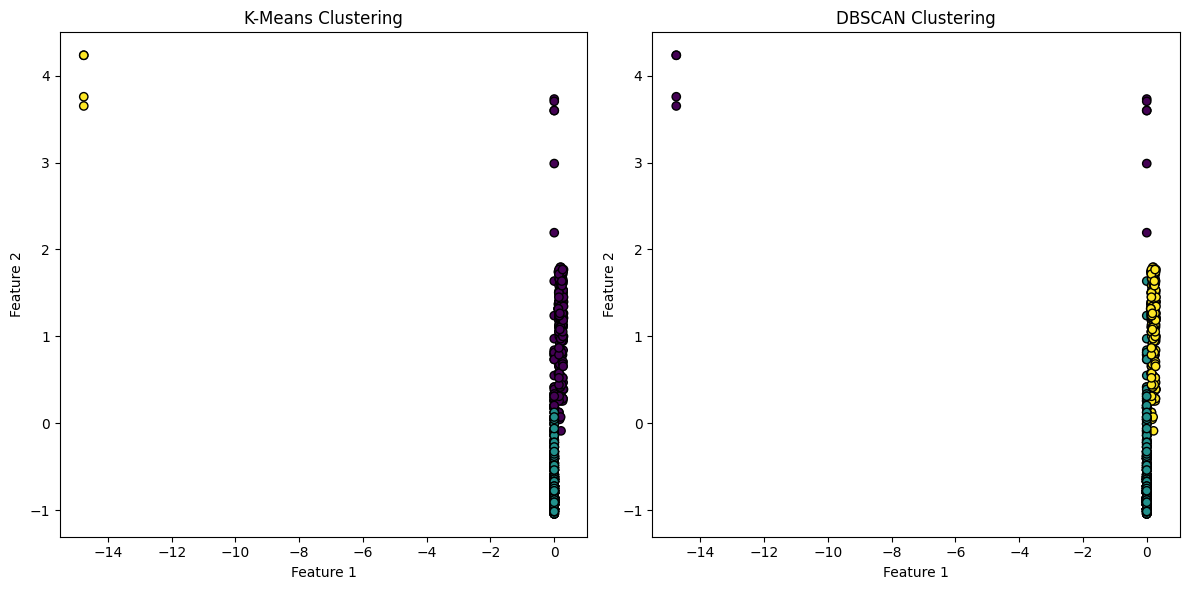

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Verify the columns in your dataset
print("Columns in the dataset:", data.columns)

# Replace 'sensor_00' to 'sensor_03' with actual sensor columns
sensor_columns = ['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03']  # Update these columns as needed

# Check if all sensor columns exist
if all(col in data.columns for col in sensor_columns):
    # Load and preprocess data
    X = data[sensor_columns]  # Example sensor columns

    # Feature Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply K-Means Clustering
    kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust number of clusters as needed
    kmeans_labels = kmeans.fit_predict(X_scaled)

    # Apply DBSCAN Clustering
    dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
    dbscan_labels = dbscan.fit_predict(X_scaled)

    # Visualize K-Means Clustering
    plt.figure(figsize=(12, 6))

    # K-Means Visualization
    plt.subplot(1, 2, 1)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolor='k')
    plt.title('K-Means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # DBSCAN Visualization
    plt.subplot(1, 2, 2)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', marker='o', edgecolor='k')
    plt.title('DBSCAN Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    plt.tight_layout()
    plt.show()
else:
    print("One or more sensor columns not found in the dataset.")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Assuming `data` is your DataFrame with features and 'timestamp' column
# For example: data = pd.read_csv('your_dataset.csv')

# Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Introduce increased noise to the features
noise_level = 1.0  # Increased noise level
noise = np.random.normal(0, noise_level, data.drop(columns=['timestamp']).shape)
data_with_noise = data.copy()
data_with_noise[data.drop(columns=['timestamp']).columns] += noise

# Introduce missing values randomly
missing_rate = 0.1  # 10% missing values
num_missing = int(missing_rate * data_with_noise.size)
missing_indices = np.random.choice(data_with_noise.size, num_missing, replace=False)
data_with_noise.values.ravel()[missing_indices] = np.nan

# Add synthetic features to increase complexity
num_synthetic_features = 10  # Increased number of synthetic features
for i in range(num_synthetic_features):
    data_with_noise[f'synthetic_feature_{i}'] = np.random.normal(0, 1, size=data_with_noise.shape[0])

# Create synthetic 'equipment_life' column (target variable)
np.random.seed(42)
data_with_noise['equipment_life'] = (
    1000 + 0.5 * data_with_noise.filter(like='sensor').sum(axis=1) +
    0.2 * data_with_noise.filter(like='synthetic_feature').sum(axis=1) +
    np.random.normal(0, 100, size=data_with_noise.shape[0])
)

# Separating features and target variable
X = data_with_noise.drop(columns=['timestamp', 'equipment_life'])  # Dropping 'timestamp' and target column
y = data_with_noise['equipment_life']  # Synthetic target variable

# Handle missing values by filling with the median of each feature
X.fillna(X.median(), inplace=True)

# Ensure sufficient data for splitting
if len(X) < 10:
    raise ValueError("Dataset is too small for splitting. Consider using cross-validation only.")

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize regression models
models = {
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

# Model Evaluation Dictionary
evaluation_results = {}

# Train and evaluate models
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Perform cross-validation to check for overfitting
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{model_name} CV R^2 Scores: {cv_scores.mean()} ± {cv_scores.std()}")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store evaluation results
    evaluation_results[model_name] = {
        'Mean Squared Error': mse,
        'R^2 Score': r2
    }

    print(f"Finished {model_name}.\n")

# Display Evaluation Results
for model_name, results in evaluation_results.items():
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {results['Mean Squared Error']:.4f}")
    print(f"R^2 Score: {results['R^2 Score']:.4f}")
    print("-------------------------------------------------------------\n")

# Hyperparameter Tuning for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [5, 10, 15]
}

grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                               param_grid=param_grid_rf,
                               scoring='r2',
                               cv=5,
                               n_jobs=-1)

grid_search_rf.fit(X_train, y_train)
print(f"Best parameters for Random Forest Regressor: {grid_search_rf.best_params_}")
print(f"Best score for Random Forest Regressor: {grid_search_rf.best_score_}")

# Hyperparameter Tuning for Gradient Boosting Regressor
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_gb = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                               param_grid=param_grid_gb,
                               scoring='r2',
                               cv=5,
                               n_jobs=-1)

grid_search_gb.fit(X_train, y_train)
print(f"Best parameters for Gradient Boosting Regressor: {grid_search_gb.best_params_}")
print(f"Best score for Gradient Boosting Regressor: {grid_search_gb.best_score_}")

# Hyperparameter Tuning for Support Vector Regressor
param_grid_svr = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4]
}

grid_search_svr = GridSearchCV(estimator=SVR(),
                               param_grid=param_grid_svr,
                               scoring='r2',
                               cv=5,
                               n_jobs=-1)

grid_search_svr.fit(X_train, y_train)
print(f"Best parameters for Support Vector Regressor: {grid_search_svr.best_params_}")
print(f"Best score for Support Vector Regressor: {grid_search_svr.best_score_}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Training Random Forest Regressor...
Random Forest Regressor CV R^2 Scores: -0.21801597217419416 ± 0.09793768716352194
Finished Random Forest Regressor.

Training Gradient Boosting Regressor...
Gradient Boosting Regressor CV R^2 Scores: -0.6201529290855208 ± 0.2013231024608695
Finished Gradient Boosting Regressor.

Training Support Vector Regressor...
Support Vector Regressor CV R^2 Scores: -0.027611553764866282 ± 0.008278193144020018
Finished Support Vector Regressor.

Model: Random Forest Regressor
Mean Squared Error: 7847.1211
R^2 Score: -0.4327
-------------------------------------------------------------

Model: Gradient Boosting Regressor
Mean Squared Error: 12001.6471
R^2 Score: -1.1912
-------------------------------------------------------------

Model: Support Vector Regressor
Mean Squared Error: 5640.2066
R^2 Score: -0.0298
-------------------------------------------------------------

Best parameters for Random Forest Regressor: {'max_depth': 10, 'min_samples_split': 15, 'n_

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.utils import resample

# Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Introduce increased noise and missing values
noise_level = 1.0  # Increased noise level
noise = np.random.normal(0, noise_level, data.drop(columns=['timestamp', 'machine_status']).shape)
data_with_noise = data.copy()
data_with_noise[data.drop(columns=['timestamp', 'machine_status']).columns] += noise

missing_rate = 0.1  # 10% missing values
num_missing = int(missing_rate * data_with_noise.size)
missing_indices = np.random.choice(data_with_noise.size, num_missing, replace=False)
data_with_noise.values.ravel()[missing_indices] = np.nan

# Add synthetic features
num_synthetic_features = 10
for i in range(num_synthetic_features):
    data_with_noise[f'synthetic_feature_{i}'] = np.random.normal(0, 1, size=data_with_noise.shape[0])

# Separate features and target variable
X = data_with_noise.drop(columns=['timestamp', 'machine_status'])
y = data['machine_status']

# Handle missing values
X.fillna(X.median(), inplace=True)

# Balance the data
X_balanced, y_balanced = resample(X, y, stratify=y, n_samples=min(y.value_counts()), random_state=42)

# Check the number of samples
num_samples = len(y_balanced)
print(f"Number of samples in balanced data: {num_samples}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced
)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=50, max_depth=15, min_samples_split=10, random_state=42
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=50, learning_rate=0.1, max_depth=6, random_state=42
    ),
    'Support Vector Machine': SVC(
        C=10, kernel='poly', degree=3, gamma='scale', probability=True, random_state=42
    )
}

# Model Evaluation Dictionary
evaluation_results = {}

# Train and evaluate models
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")

    # Perform cross-validation with a lower number of splits if needed
    cv_splits = min(num_samples, 5)  # Use fewer splits if number of samples is small
    cv_scores = cross_val_score(model, X_balanced, y_balanced, cv=cv_splits, scoring='roc_auc')
    print(f"{model_name} CV ROC-AUC Scores: {cv_scores.mean()} ± {cv_scores.std()}")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # Store evaluation results
    evaluation_results[model_name] = {
        'Accuracy': accuracy,
        'ROC-AUC': roc_auc,
        'Classification Report': report,
        'Confusion Matrix': confusion
    }

    print(f"Finished {model_name}.\n")

# Display Evaluation Results
for model_name, results in evaluation_results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {results['Accuracy']:.4f}")
    print(f"ROC-AUC Score: {results['ROC-AUC']:.4f}")
    print(f"Classification Report:\n{results['Classification Report']}")
    print(f"Confusion Matrix:\n{results['Confusion Matrix']}")
    print("-------------------------------------------------------------\n")
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Introduce increased noise and missing values
noise_level = 1.0  # Increased noise level
noise = np.random.normal(0, noise_level, data.drop(columns=['timestamp']).shape)
data_with_noise = data.copy()
data_with_noise[data.drop(columns=['timestamp']).columns] += noise

missing_rate = 0.1  # 10% missing values
num_missing = int(missing_rate * data_with_noise.size)
missing_indices = np.random.choice(data_with_noise.size, num_missing, replace=False)
data_with_noise.values.ravel()[missing_indices] = np.nan

# Add synthetic features
num_synthetic_features = 10
for i in range(num_synthetic_features):
    data_with_noise[f'synthetic_feature_{i}'] = np.random.normal(0, 1, size=data_with_noise.shape[0])

# Create synthetic 'equipment_life' column (target variable)
np.random.seed(42)
data_with_noise['equipment_life'] = (
    1000 + 0.5 * data_with_noise.filter(like='sensor').sum(axis=1) +
    0.2 * data_with_noise.filter(like='synthetic_feature').sum(axis=1) +
    np.random.normal(0, 100, size=data_with_noise.shape[0])
)

# Separate features and target variable
X = data_with_noise.drop(columns=['timestamp', 'equipment_life'])
y = data_with_noise['equipment_life']

# Handle missing values
X.fillna(X.median(), inplace=True)

# Ensure sufficient data for splitting
if len(X) < 10:
    raise ValueError("Dataset is too small for splitting. Consider using cross-validation only.")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize regression models
models = {
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

# Model Evaluation Dictionary
evaluation_results = {}

# Train and evaluate models
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")

    # Perform cross-validation with a lower number of splits if needed
    cv_splits = min(len(X), 5)  # Use fewer splits if number of samples is small
    cv_scores = cross_val_score(model, X, y, cv=cv_splits, scoring='r2')
    print(f"{model_name} CV R^2 Scores: {cv_scores.mean()} ± {cv_scores.std()}")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store evaluation results
    evaluation_results[model_name] = {
        'Mean Squared Error': mse,
        'R^2 Score': r2
    }

    print(f"Finished {model_name}.\n")

# Display Evaluation Results
for model_name, results in evaluation_results.items():
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {results['Mean Squared Error']:.4f}")
    print(f"R^2 Score: {results['R^2 Score']:.4f}")
    print("-------------------------------------------------------------\n")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of samples in balanced data: 47
Evaluating Random Forest...
Random Forest CV ROC-AUC Scores: 0.6239999999999999 ± 0.17234848418248416
Finished Random Forest.

Evaluating Gradient Boosting...
Gradient Boosting CV ROC-AUC Scores: 0.6170000000000001 ± 0.16277591959500642
Finished Gradient Boosting.

Evaluating Support Vector Machine...
Support Vector Machine CV ROC-AUC Scores: 0.666 ± 0.18693314312876677
Finished Support Vector Machine.

Model: Random Forest
Accuracy: 0.6000
ROC-AUC Score: 0.6786
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.62      0.62      0.62         8

    accuracy                           0.60        15
   macro avg       0.60      0.60      0.60        15
weighted avg       0.60      0.60      0.60        15

Confusion Matrix:
[[4 3]
 [3 5]]
-------------------------------------------------------------

Model: Gradient Boosting
Accuracy: 0.6667
ROC-AU